#### 6AIML Internship at Prutor : Project by- Ronak Sajal 

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

%matplotlib inline

## Importing the dataset

In [2]:
from sklearn.datasets import fetch_california_housing
dataset=fetch_california_housing(as_frame=True)

In [3]:
dataset.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
print("The number of rows and colums are {} .".format(dataset.frame.shape))
print("Column names are:- \n {}".format(dataset.frame.columns))

The number of rows and colums are (20640, 9) .
Column names are:- 
 Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


In [5]:
dataset.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
print(dataset.frame.dtypes)

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


#### The median house values are continuous and hence it is a regression problem

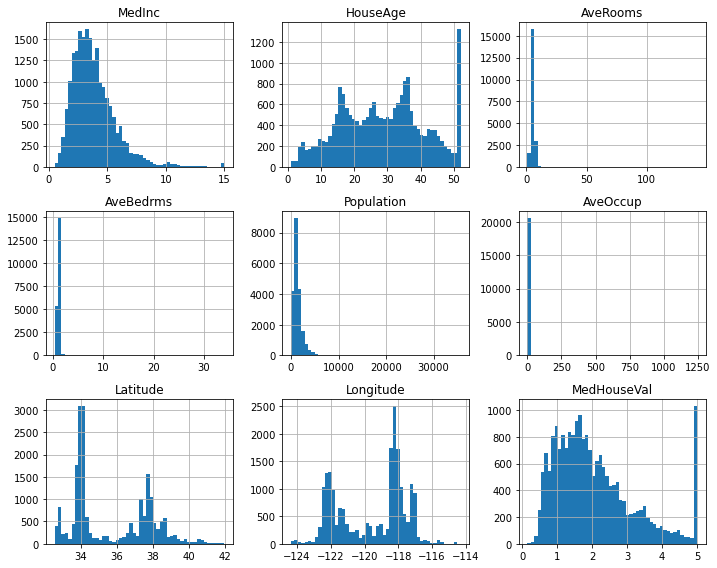

In [7]:
dataset.frame.hist(bins=50,figsize=(10,8))
plt.tight_layout()
plt.show()

In [8]:
datsetcorr=dataset.frame.corr()
datsetcorr.style.background_gradient()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot:>

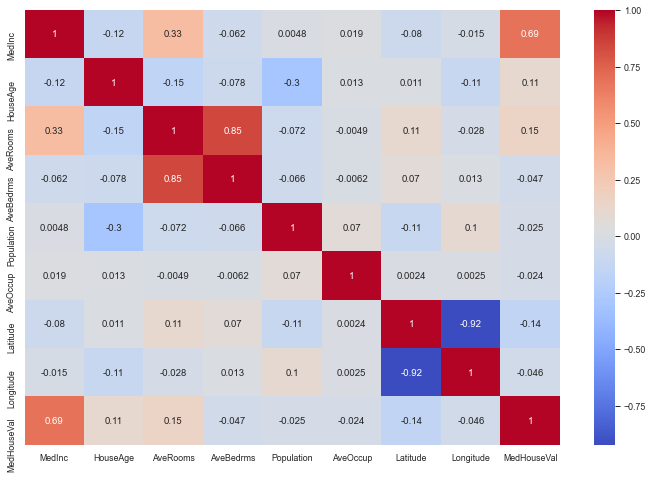

In [9]:
sns.set(context="paper")
fig, axe = plt.subplots(figsize=(12,8))
sns.heatmap(dataset.frame.corr(),vmax=1,cmap='coolwarm',annot=True)

In [10]:
dataset.frame.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## Splitting the dataset into the Training set and Test set

In [11]:
X=dataset.data
Y=dataset.target

In [12]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
Y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [15]:
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("Y_train shape {} and size {}".format(Y_train.shape,Y_test.size))
print("Y_test shape {} and size {}".format(Y_test.shape,Y_test.size))

X_train shape (16512, 8) and size 132096
X_test shape (4128, 8) and size 33024
Y_train shape (16512,) and size 4128
Y_test shape (4128,) and size 4128


In [16]:
#X_train.head()

In [17]:
#Y_train.head()

In [18]:
#X_test.head()

In [19]:
#Y_test.head()

## Feature Scaling

In [20]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
print(X_train[0:5,:])
print('\nTest Data\n')
print(X_test[0:5,:])

[[ 0.75502148  0.58987935  0.27298294 -0.14586847  0.53062799 -0.01649408
  -0.79234388  0.79479785]
 [ 1.32113211  1.22742396  0.60435659 -0.1648467  -0.46886166 -0.03955738
  -0.67993877  0.7248619 ]
 [ 1.26636613  0.19141397  0.54039853 -0.30916676 -0.2684409  -0.05555732
   1.39955579 -0.86867884]
 [-0.58015918  0.35080012 -0.24576883 -0.04014587 -0.11420405  0.10676709
  -0.81107807  0.68489849]
 [-0.39927681  0.11172089 -0.50405271 -0.25111063 -0.58911412 -0.00678051
   0.62677065 -1.2133632 ]]

Test Data

[[-0.48854482  0.4304932  -0.43289336 -0.4349809  -0.65446872 -0.01770044
   1.04828981 -0.84869714]
 [ 0.20970806  0.66957243  0.19056448 -0.29400739 -0.64488338 -0.05760097
   1.05765691 -1.23834033]
 [ 0.19562995 -0.76490295  0.65796802 -0.10054839  0.17248479 -0.04089232
  -0.75019196  1.2743587 ]
 [ 0.86961942 -0.12735834  0.29059474 -0.25025671  0.53498496  0.01936525
  -0.75019196  0.73984817]
 [ 0.56965971  0.51018627  0.27695937 -0.07320183  0.03131886  0.02622921
   0

## Performing Linear Regression on the Training set

In [21]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [22]:
print("The intercept is: ",regressor.intercept_)
print('The coefficients are: ',regressor.coef_)

The intercept is:  2.069430625605616
The coefficients are:  [ 0.82990124  0.11396929 -0.27861299  0.31911359 -0.00700368 -0.03987228
 -0.89177537 -0.86133896]


In [23]:
#Predicting on the test data
Y_pred=regressor.predict(X_test)
print(len(Y_pred))
print(len(Y_test))
print(Y_pred[0:5])
print(Y_test[0:5])

4128
4128
[1.49631739 2.30311443 1.50097428 2.6430138  2.89484117]
16418    1.040
1534     3.106
13770    1.916
7126     2.768
16767    2.770
Name: MedHouseVal, dtype: float64


In [24]:
test = pd.DataFrame({'Predicted':Y_pred,'Actual':Y_test})
test = test.reset_index()
test=test.drop(['index'],axis=1)

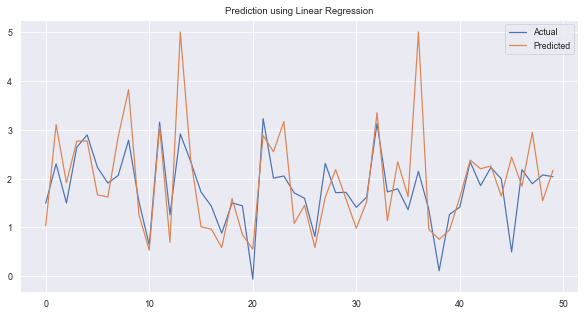

In [25]:
fig= plt.figure(figsize=(10,5))
plt.title('Prediction using Linear Regression')
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

#### Evaluating the Model Performance

In [26]:
Reg_Score=r2_score(Y_test,Y_pred)
print(Reg_Score)

0.6014294432901927


## Performing Decision Tree Regression on the Training Set

In [27]:
DTregressor= DecisionTreeRegressor(max_depth=9)
DTregressor.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=9)

In [28]:
Y_pred_dt= DTregressor.predict(X_test)
print(len(Y_pred_dt))
print(len(Y_test))
print(Y_pred_dt[0:5])
print(Y_test[0:5])

4128
4128
[1.07932853 3.03327146 2.20889175 2.26290873 2.59606452]
16418    1.040
1534     3.106
13770    1.916
7126     2.768
16767    2.770
Name: MedHouseVal, dtype: float64


In [29]:
test_dt=pd.DataFrame({'Predicted':Y_pred_dt,'Actual':Y_test})
test_dt=test_dt.reset_index()
test_dt=test_dt.drop(['index'],axis=1)

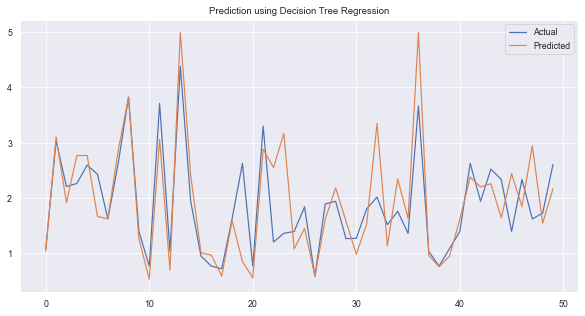

In [30]:
fig= plt.figure(figsize=(10,5))
plt.title('Prediction using Decision Tree Regression')
plt.plot(test_dt[:50])
plt.legend(['Actual','Predicted'])

#### Evaluating the Model Performance

In [31]:
Tree_Score=r2_score(Y_test,Y_pred_dt)
print(Tree_Score)

0.6906249125448407


## Performing Random Forest Regression on the Training Set

In [32]:
RfRegressor= RandomForestRegressor()
RfRegressor.fit(X_train,Y_train)

RandomForestRegressor()

In [33]:
Y_pred_rf = RfRegressor.predict(X_test)
print(len(Y_pred_rf))
print(len(Y_test))
print(Y_pred_rf[0:5])
print(Y_test[0:5])

4128
4128
[1.07113   2.1333501 1.5305    2.38926   2.66792  ]
16418    1.040
1534     3.106
13770    1.916
7126     2.768
16767    2.770
Name: MedHouseVal, dtype: float64


In [34]:
test_rf=pd.DataFrame({'Predicted':Y_pred_rf,'Actual':Y_test})
test_rf=test_rf.reset_index()
test_rf=test_rf.drop(['index'],axis=1)

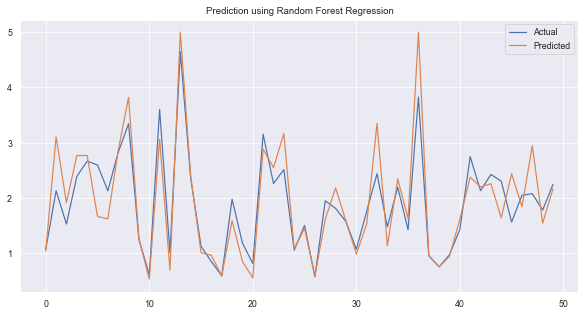

In [35]:
fig= plt.figure(figsize=(10,5))
plt.title('Prediction using Random Forest Regression')
plt.plot(test_rf[:50])
plt.legend(['Actual','Predicted'])

#### Evaluating the Model Performance

In [36]:
Forest_Score=r2_score(Y_test,Y_pred_rf)
print(Forest_Score)

0.8131707212843451


## Summary

In [37]:
data=[Reg_Score,Tree_Score,Forest_Score]
index=['Linear Regression','Decision Tree Regression','Random Forest Regression']
pd.DataFrame(data, index=index, columns=['Scores'])

,Scores
Linear Regression,0.601429
Decision Tree Regression,0.690625
Random Forest Regression,0.813171


##### So, the random forest regressor is winner here out of all the ML Algorithm.